In [1]:
import pandas as pd
df = pd.read_csv('c:/data/convenience/temp/df_merge.csv', encoding='ANSI', index_col=0)
df.columns

Index(['개업점포수', '폐업점포수', '총상주인구수', '남성상주인구수', '여성상주인구수', '연령대10상주인구수',
       '연령대20상주인구수', '연령대30상주인구수', '연령대40상주인구수', '연령대50상주인구수', '연령대60이상상주인구수',
       '총가구수', '아파트가구수', '비아파트가구수', '아파트평균시가', '점포수', '유사업종점포수', '개업율', '폐업률',
       '프랜차이즈점포수', '총직장인구수', '남성직장인구수', '여성직장인구수', '연령대10직장인구수', '연령대20직장인구수',
       '연령대30직장인구수', '연령대40직장인구수', '연령대50직장인구수', '연령대60이상직장인구수', '관공서수', '은행수',
       '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '총유동인구수',
       '남성유동인구수', '여성유동인구수', '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수',
       '연령대40유동인구수', '연령대50유동인구수', '연령대60이상유동인구수', '월매출평균', 'cluster'],
      dtype='object')

In [2]:
#생존률 계산
df['survive']=(1-df['폐업점포수']/(df['유사업종점포수']+df['폐업점포수']))*100
df['survive'].describe()

count    1177.000000
mean       67.201696
std        20.661359
min         0.000000
25%        51.219512
50%        62.529274
75%        81.481481
max       100.000000
Name: survive, dtype: float64

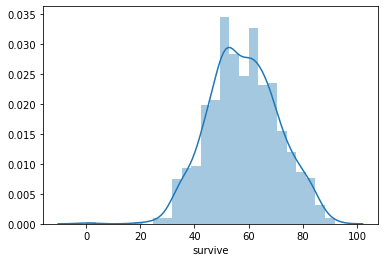

In [3]:
#생존률이 100인 상권 제외(1상권 다수)
import seaborn as sns
sns.distplot(df[df['survive'] != 100]['survive'])

In [4]:
cluster0=df[df['cluster']==0] #3상권
cluster1=df[df['cluster']==1] #2상권
cluster2=df[df['cluster']==2] #1상권
cluster3=df[df['cluster']!=2] #1상권 제외 상권

#생존율이 0인 상권 제외
cluster0=cluster0[cluster0['survive']!=0]
cluster1=cluster1[cluster1['survive']!=0]
cluster2=cluster2[cluster2['survive']!=0]
cluster3=cluster3[cluster3['survive']!=0]
print(len(cluster0))
print(len(cluster1))
print(len(cluster2))

937
216
23


In [5]:
############################상권 전체 회귀분석############################
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df.iloc[:,:-2]), columns=df.columns[:-2], index=df.index)

In [6]:
#전진 및 후진 제거 후 최적 변수
cols=['연령대30상주인구수', '아파트평균시가', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '연령대20유동인구수',  '월매출평균']

In [7]:
import statsmodels.api as sm 
X=df_scaled[cols]
y=df['survive']
model=sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                survive   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              375.2
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:57:59   Log-Likelihood:                         -5670.7
No. Observations:                1177   AIC:                                  1.137e+04
Df Residuals:                    1163   BIC:                                  1.144e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
13,4.244140,은행수
12,3.640945,연령대20유동인구수
11,3.549218,약국수
10,3.161082,숙박시설수
9,2.965992,대중교통
8,2.266347,연령대30상주인구수
7,2.163971,아파트평균시가
6,1.991578,연령대30직장인구수
5,1.718738,관공서수
4,1.491976,극장수


In [9]:
############################제 1상권 회귀분석############################
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(cluster2.iloc[:,:-2]), columns=cluster2.columns[:-2], index=cluster2.index)

In [10]:
#전진 및 후진 제거 후 최적 변수
cols1=['연령대30상주인구수', '아파트평균시가', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '월매출평균']

In [11]:
X=df_scaled[cols1]
y=cluster2['survive']
model=sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                survive   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              7.121
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                     0.00136
Time:                        10:58:00   Log-Likelihood:                         -110.69
No. Observations:                  23   AIC:                                      245.4
Df Residuals:                      11   BIC:                                      259.0
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
#다중공선성 확인
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
11,7.959349,연령대30직장인구수
10,6.578223,은행수
9,4.021275,아파트평균시가
8,3.761832,약국수
7,3.599398,대중교통
6,2.862604,월매출평균
5,2.280735,연령대30상주인구수
4,1.965898,교육기관
3,1.727244,관공서수
2,1.695642,의료기관


In [13]:
############################제 2상권 회귀분석############################
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(cluster1.iloc[:,:-2]), columns=cluster1.columns[:-2], index=cluster1.index)

In [14]:
#전진 및 후진 제거 후 최적 변수
cols2=['개업점포수', '연령대30상주인구수', '아파트평균시가', '점포수', '개업율', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '연령대20유동인구수', '월매출평균']

In [15]:
X=df_scaled[cols2]
y=cluster1['survive']
model=sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                survive   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              61.19
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                    6.43e-68
Time:                        10:58:00   Log-Likelihood:                         -1064.9
No. Observations:                 216   AIC:                                      2162.
Df Residuals:                     200   BIC:                                      2216.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
15,3.810639,개업점포수
14,3.307748,연령대30상주인구수
13,3.104266,개업율
12,2.887485,아파트평균시가
11,2.492982,연령대20유동인구수
10,2.282770,약국수
9,2.225085,월매출평균
8,2.211211,연령대30직장인구수
7,2.208689,은행수
6,1.960490,대중교통


In [17]:
############################제 3상권 회귀분석############################
scaler=MinMaxScaler() # 표준화 : 평균0, 표준편차 1
df_scaled=pd.DataFrame(scaler.fit_transform(cluster0.iloc[:,:-2]), columns=cluster0.columns[:-2], index=cluster0.index)

In [18]:
#전진 및 후진 제거 후 최적 변수
cols3=['개업점포수', '연령대30상주인구수', '아파트평균시가', '점포수', '개업율', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '연령대20유동인구수', '월매출평균']

In [19]:
X=df_scaled[cols3]
y=cluster0['survive']
model=sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                survive   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              313.5
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:58:00   Log-Likelihood:                         -4372.2
No. Observations:                 937   AIC:                                      8778.
Df Residuals:                     920   BIC:                                      8861.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
#다중공선성 확인
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
16,8.123556,개업점포수
15,5.200558,은행수
14,3.947164,약국수
13,3.944030,연령대20유동인구수
12,3.844154,점포수
11,3.479832,숙박시설수
10,3.265832,대중교통
9,3.203327,개업율
8,3.198760,연령대30상주인구수
7,2.869450,월매출평균


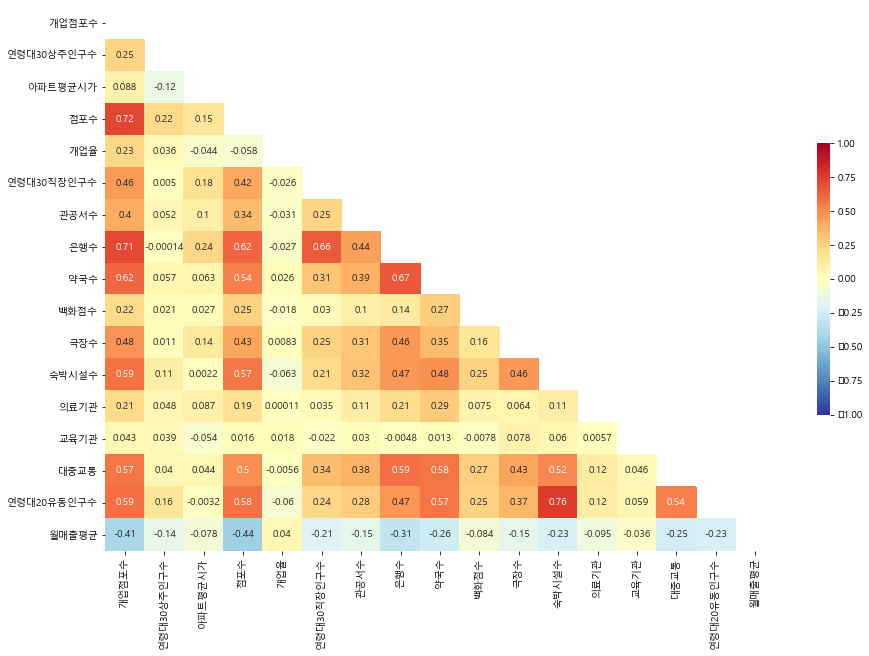

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,10))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), annot=True, mask=mask, cbar_kws={'shrink':.5}, cmap='RdYlBu_r', vmin =-1, vmax=1)
plt.show()

In [22]:
############################제 2, 3상권 회귀분석############################
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(cluster3.iloc[:,:-2]), columns=cluster3.columns[:-2], index=cluster3.index)

In [38]:
#전진 및 후진 제거 후 최적 변수
#다중공선성 & p-value 반영
cols3=['비아파트가구수', '아파트평균시가',  '약국수', '극장수', '의료기관', '교육기관', '대중교통', '월매출평균']

In [39]:
X=df_scaled[cols3]
y=cluster3['survive']
model=sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                survive   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              787.3
Date:                Sat, 19 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:59:40   Log-Likelihood:                         -5454.3
No. Observations:                1153   AIC:                                  1.092e+04
Df Residuals:                    1145   BIC:                                  1.096e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
#다중공선성 확인
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features']=X.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(10)

,VIF Factor,features
7,2.579736,대중교통
6,2.450746,약국수
5,2.225965,비아파트가구수
4,2.039056,아파트평균시가
3,1.710167,월매출평균
2,1.272499,극장수
1,1.209327,의료기관
0,1.160206,교육기관


In [46]:
cols1=['연령대30상주인구수', '아파트평균시가', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '월매출평균','survive']
cols2=['개업점포수', '연령대30상주인구수', '아파트평균시가', '점포수', '개업율', '연령대30직장인구수', '관공서수', '은행수', '약국수', '백화점수', '극장수', '숙박시설수', '의료기관', '교육기관', '대중교통', '연령대20유동인구수', '월매출평균', 'survive']
cols4=['비아파트가구수', '아파트평균시가',  '약국수', '극장수', '의료기관', '교육기관', '대중교통', '월매출평균', 'survive']

In [47]:
cluster0[cols2].to_csv('c:/data/convenience/temp/df_dis3.csv', encoding='ANSI') #제 3상권
cluster1[cols2].to_csv('c:/data/convenience/temp/df_dis2.csv', encoding='ANSI') #제 2상권
cluster2[cols1].to_csv('c:/data/convenience/temp/df_dis1.csv', encoding='ANSI') #제 1상권
cluster3[cols4].to_csv('c:/data/convenience/temp/df_dis2,3.csv', encoding='ANSI') #제 2, 3상권